In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [4]:
X = df.drop('Species', axis=1)
y = df['Species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
nb = GaussianNB()
nb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [9]:
models = {'Logistic Regression': lr, 'KNN': knn, 'Naive Bayes': nb}

for name, model in models.items():
    y_pred = model.predict(X)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y, y_pred))


Logistic Regression
Accuracy: 1.0

KNN
Accuracy: 0.9933333333333333

Naive Bayes
Accuracy: 0.9933333333333333


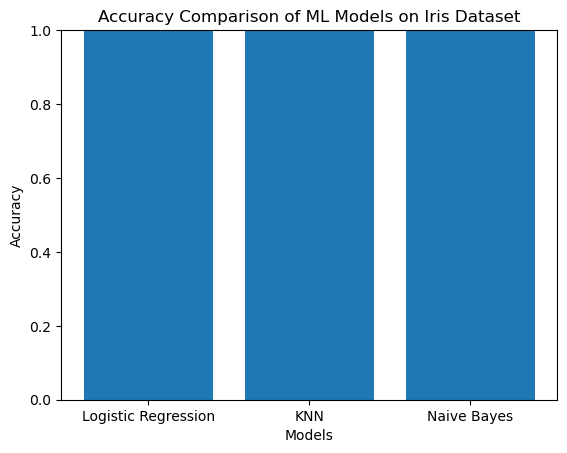

In [10]:
accuracies = {}

models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "Naive Bayes": nb
}

# Evaluate on TEST data
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Bar plot for accuracy comparison
plt.figure()
plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models on Iris Dataset")
plt.ylim(0, 1)
plt.show()

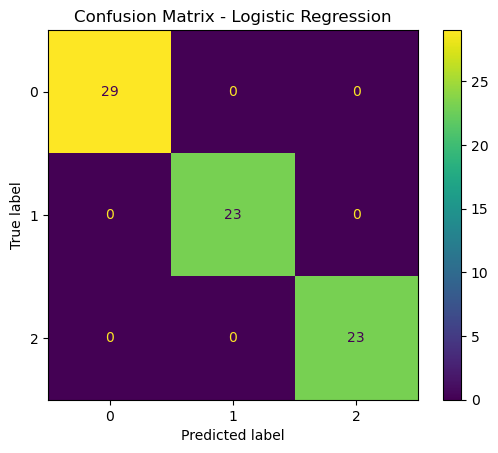

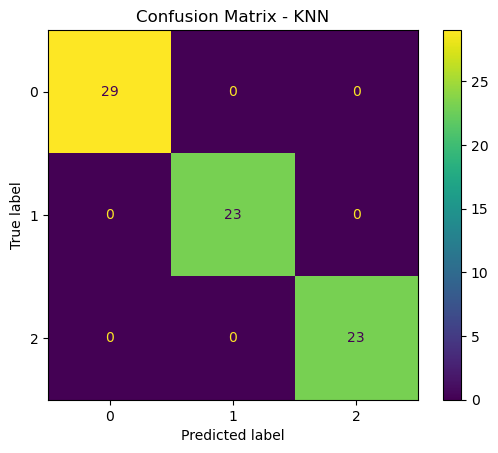

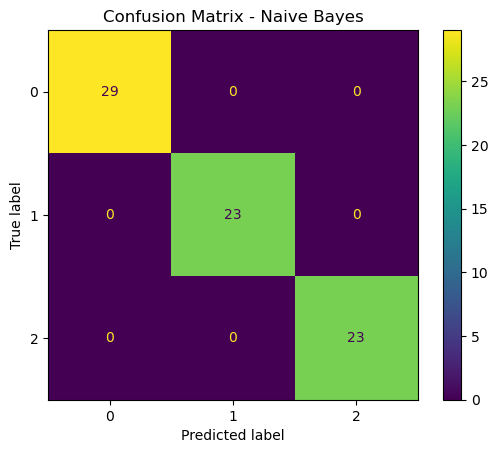

In [11]:
models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "Naive Bayes": nb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred
    )
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()